In [51]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fires-from-space-australia-and-new-zeland/fire_nrt_V1_96617.csv
/kaggle/input/fires-from-space-australia-and-new-zeland/fire_archive_V1_96617.csv
/kaggle/input/fires-from-space-australia-and-new-zeland/fire_nrt_M6_96619.csv
/kaggle/input/fires-from-space-australia-and-new-zeland/fire_archive_M6_96619.csv


In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import  DecisionTreeClassifier

In [53]:
import pandas as pd
fire_file_path = '../input/fires-from-space-australia-and-new-zeland/fire_archive_M6_96619.csv'
# Fill in the line below to read the file into a variable space_data
space_data = pd.read_csv(fire_file_path) 

space_data.describe()

,latitude,longitude,brightness,scan,track,acq_time,confidence,version,bright_t31,frp,type
count,36011.000000,36011.000000,36011.000000,36011.000000,36011.000000,36011.000000,36011.000000,3.601100e+04,36011.000000,36011.000000,36011.000000
mean,-19.100962,138.931446,328.750696,1.620905,1.215281,600.025798,67.551387,6.300000e+00,301.339138,51.132176,0.019439
std,7.265777,9.261400,18.992808,0.813764,0.247852,548.369111,23.179946,3.728625e-12,9.724462,92.280112,0.198326
min,-42.762800,114.104300,300.000000,1.000000,1.000000,0.000000,0.000000,6.300000e+00,267.000000,0.000000,0.000000
25%,-26.370250,131.072250,316.500000,1.100000,1.000000,205.000000,52.000000,6.300000e+00,293.600000,13.800000,0.000000
50%,-15.706500,136.738500,326.400000,1.300000,1.100000,424.000000,70.000000,6.300000e+00,302.400000,25.800000,0.000000
75%,-13.343600,147.477500,336.700000,1.900000,1.300000,600.000000,86.000000,6.300000e+00,308.600000,52.800000,0.000000
max,-10.072600,153.490400,504.400000,4.800000,2.000000,2359.000000,100.000000,6.300000e+00,400.100000,3679.500000,3.000000


In [54]:
space_data.shape

(36011, 15)

In [55]:
import pandas as pd
nrt_file_path = '../input/fires-from-space-australia-and-new-zeland/fire_nrt_M6_96619.csv'
# Fill in the line below to read the file into a variable space_data
fire_data = pd.read_csv(fire_file_path) 

fire_data.describe()

,latitude,longitude,brightness,scan,track,acq_time,confidence,version,bright_t31,frp,type
count,36011.000000,36011.000000,36011.000000,36011.000000,36011.000000,36011.000000,36011.000000,3.601100e+04,36011.000000,36011.000000,36011.000000
mean,-19.100962,138.931446,328.750696,1.620905,1.215281,600.025798,67.551387,6.300000e+00,301.339138,51.132176,0.019439
std,7.265777,9.261400,18.992808,0.813764,0.247852,548.369111,23.179946,3.728625e-12,9.724462,92.280112,0.198326
min,-42.762800,114.104300,300.000000,1.000000,1.000000,0.000000,0.000000,6.300000e+00,267.000000,0.000000,0.000000
25%,-26.370250,131.072250,316.500000,1.100000,1.000000,205.000000,52.000000,6.300000e+00,293.600000,13.800000,0.000000
50%,-15.706500,136.738500,326.400000,1.300000,1.100000,424.000000,70.000000,6.300000e+00,302.400000,25.800000,0.000000
75%,-13.343600,147.477500,336.700000,1.900000,1.300000,600.000000,86.000000,6.300000e+00,308.600000,52.800000,0.000000
max,-10.072600,153.490400,504.400000,4.800000,2.000000,2359.000000,100.000000,6.300000e+00,400.100000,3679.500000,3.000000


In [56]:
fire_data.shape

(36011, 15)

In [57]:
space_data.columns

Index(['latitude', 'longitude', 'brightness', 'scan', 'track', 'acq_date',
       'acq_time', 'satellite', 'instrument', 'confidence', 'version',
       'bright_t31', 'frp', 'daynight', 'type'],
      dtype='object')

In [58]:
fire_data.columns

Index(['latitude', 'longitude', 'brightness', 'scan', 'track', 'acq_date',
       'acq_time', 'satellite', 'instrument', 'confidence', 'version',
       'bright_t31', 'frp', 'daynight', 'type'],
      dtype='object')

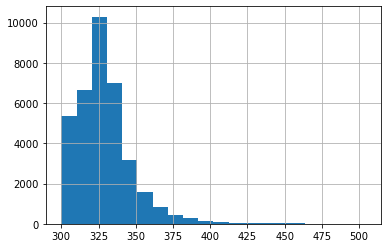

In [59]:
fire_data['brightness'].hist(bins=20)

In [60]:
fire_data['brightness'].quantile([0, 0.25, .75, .9])

0.00    300.0
0.25    316.5
0.75    336.7
0.90    351.0
Name: brightness, dtype: float64

In [61]:
fire_data['longitude'].quantile([0, 0.25, .75, .9])

0.00    114.10430
0.25    131.07225
0.75    147.47750
0.90    152.26610
Name: longitude, dtype: float64

In [62]:
fire_data['latitude'].quantile([0, 0.25, .75, .9])

0.00   -42.76280
0.25   -26.37025
0.75   -13.34360
0.90   -12.34470
Name: latitude, dtype: float64

In [63]:
def brightness_classification(brightness):
     
    if brightness < 316.5:
        return 'Low'
    elif 336.7 <= brightness <= 351.0:
        return 'High'
    else:
        return 'Extreme'

In [64]:
fire_data['brightness'] = fire_data['brightness'].fillna(fire_data['brightness'].mean())
fire_data['longitude'] = fire_data['longitude'].fillna(fire_data['longitude'].mean())
fire_data['latitude'] = fire_data['latitude'].fillna(fire_data['latitude'].mean())
fire_data['brightness_temperature'] = fire_data['brightness'].apply(brightness_classification)

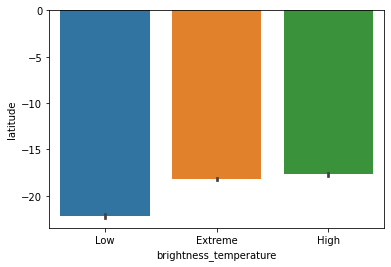

In [65]:
sns.barplot(x='brightness_temperature', y='latitude', data=fire_data)

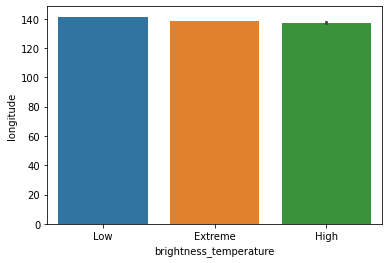

In [66]:
sns.barplot(x='brightness_temperature', y='longitude', data=fire_data)

In [69]:
df= pd.DataFrame(fire_data)

In [70]:
import folium
m3 = folium.Map(location=[-38.043995, 145.264296], tiles='cartodbdark_matter', zoom_start=4)

for i in range(0,3000):
    df.loc[i, 'brightness']
    def color_producer(val):
        if val < 325 :
            return 'red'
        else:
            return 'orange'
for i in range(0,3000):
	folium.Circle(location=[df.iloc[i]['latitude'], df.iloc[i]['longitude']], radius=120*df.iloc[i]['brightness'], color=color_producer(df.iloc[i]['brightness'])).add_to(m3)
m3